**Task 1: Term Deposit Subscription Prediction (Bank Marketing)**

**Objective:**

Predict whether a bank customer will subscribe to a term deposit as a result of a marketing campaign.

1. **Load and explore the dataset**

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank.csv')

# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())

# Display a summary of numerical columns
print(df.describe())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

2. **Encode categorical features**

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('deposit', axis=1)
y = df['deposit']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Identify binary categorical columns for Label Encoding
binary_cols = ['default', 'housing', 'loan']
for col in binary_cols:
    if col in X.columns:
        X[col] = X[col].map({'yes': 1, 'no': 0})
        
# Identify columns for One-Hot Encoding
one_hot_cols = [col for col in categorical_cols if col not in binary_cols]

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_cols)
    ],
    remainder='passthrough'
)

# Apply the preprocessor to the data
X_encoded = preprocessor.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

3. **Train classification models**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

c:\Users\Shaheer Bilal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


4. **Evaluate the models**

Logistic Regression Confusion Matrix:


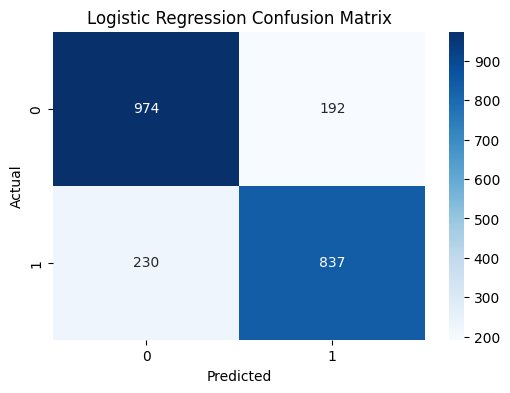

Logistic Regression F1-Score: 79.8664%

Random Forest Confusion Matrix:


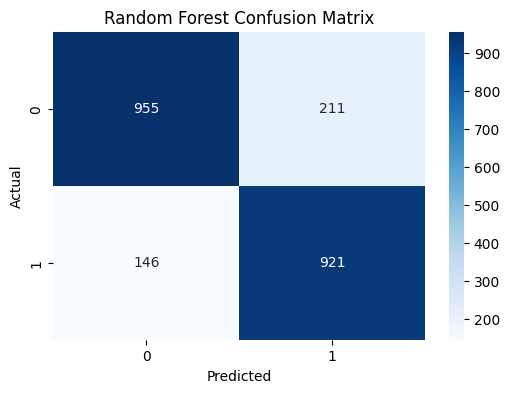

Random Forest F1-Score: 83.7653%



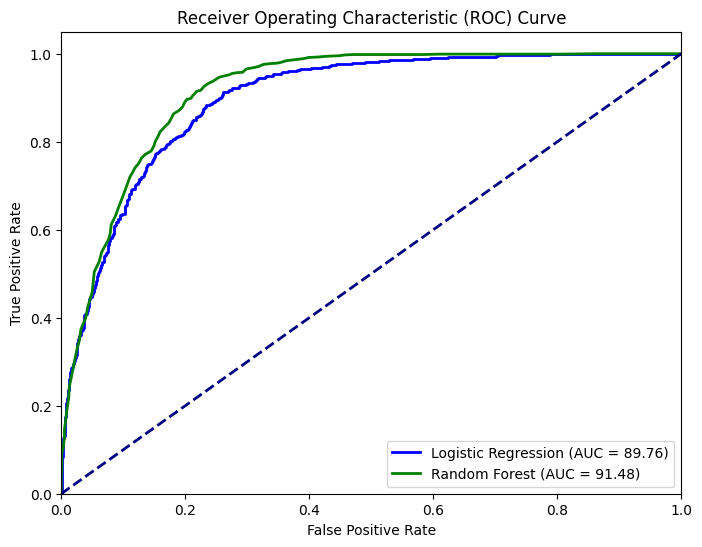

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc

# Make predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
cm_lr = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# F1-Score for Logistic Regression
f1_lr = f1_score(y_test, lr_preds)
print(f"Logistic Regression F1-Score: {f1_lr*100:.4f}%\n")

# Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# F1-Score for Random Forest
f1_rf = f1_score(y_test, rf_preds)
print(f"Random Forest F1-Score: {f1_rf*100:.4f}%\n")

# ROC Curve
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr*100:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf*100:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Here's a breakdown of what each visualization means:

1. **Logistic Regression:**

Visualization: A Logistic Regression Confusion Matrix.

What it shows: This matrix evaluates the performance of the Logistic Regression model on a classification task.

True Negatives (top-left): 974 instances were correctly predicted as class 0.

False Positives (top-right): 192 instances were incorrectly predicted as class 1 when they were actually class 0.

False Negatives (bottom-left): 230 instances were incorrectly predicted as class 0 when they were actually class 1.

True Positives (bottom-right): 837 instances were correctly predicted as class 1.

Metric: The F1-score for this model is reported as 79.864%. The F1-score is the harmonic mean of precision and recall, and it provides a single metric that balances both.

2. **Random Forest:**

Visualization: A Random Forest Confusion Matrix.

What it shows: This matrix performs the same evaluation for the Random Forest model.

True Negatives: 955

False Positives: 211

False Negatives: 146

True Positives: 921

Metric: The F1-score for this model is reported as 83.765%.

3. **ROC Curve:**

Visualization: A Receiver Operating Characteristic (ROC) Curve.

What it shows: This plot compares the performance of both models across all possible classification thresholds.

X-axis: False Positive Rate (FPR), which is the proportion of negative cases that are incorrectly classified as positive.

Y-axis: True Positive Rate (TPR), which is the proportion of positive cases that are correctly identified. This is also known as recall or sensitivity.

The dashed line: The diagonal line represents a random classifier (or a poor model), which has an Area Under the Curve (AUC) of 0.5.

**Model Comparison:**

The blue line represents Logistic Regression, with an AUC of 89.76%.

The green line represents Random Forest, with an AUC of 91.48%.

What the AUC means: The Area Under the Curve (AUC) is a measure of the model's ability to distinguish between classes. A higher AUC indicates a better model.

**Summary of Findings:**

By looking at all three visualizations, we can draw the following conclusions about the two models:

F1-Score: The Random Forest model has a higher F1-score (83.765%) than the Logistic Regression model (79.864%), indicating it has a better balance of precision and recall.

AUC Score: The Random Forest model also has a higher AUC (91.48%) than the Logistic Regression model (89.76%). This means that overall, the Random Forest model is better at separating the positive and negative classes.

Confusion Matrix Details: The Random Forest model correctly identified more true positives (921 vs. 837) and had fewer false negatives (146 vs. 230) compared to the Logistic Regression model. This suggests it is better at identifying the positive class (class 1).

In conclusion, all the visualizations consistently point to the Random Forest model performing better than the Logistic Regression model for this specific classification task.